In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Answers 1,2,4,5**

In [2]:
img = cv2.imread(r'C:\Users\khale\Desktop\tps\deg\130_1180_711_90.jpg', 1) 
demention = np.shape(img)
print (demention)
print("hieght = {}, width = {}".format(demention[1],demention[0]))
brightness = np.mean(img)
print ("brightness is : ",np.round(brightness, 2))
contrast = np.std(img)
print ("contrast is : ",np.round(contrast, 2))
# cv2.imshow('image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

(711, 1180, 3)
hieght = 1180, width = 711
brightness is :  95.93
contrast is :  75.5


**Answers 6**

In [3]:
height, width, channels = img.shape
red_chanal = np.zeros((height, width, 3), dtype=np.uint8)
green_chanal = np.zeros((height, width, 3), dtype=np.uint8)
blue_chanal = np.zeros((height, width, 3), dtype=np.uint8)
blue_chanal[:, :, 0] = img[:, :, 0]
green_chanal[:, :, 1] = img[:, :, 1]
red_chanal[:, :, 2] = img[:, :, 2]
# cv2.imshow('Original Image', img)
# cv2.imshow('Blue Channel', blue_chanal)
# cv2.imshow('Green Channel', green_chanal)
# cv2.imshow('Red Channel', red_chanal)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

**Answers 3,7,8,9**

In [4]:
r = img[10, 15, 0];print(f"img [10][15] for red = {r}")
g = img[10, 15, 1];print(f"img [10][15] for green = {g}")
b = img[10, 15, 2];print(f"img [10][15] for blue = {b}")
gray_average = (img[:, :, 0] + img[:, :, 1] + img[:, :, 2])
weights = [0.29, 0.58, 0.11]
gray_weights = (img[:, :, 0] * 0.29 + img[:, :, 1] * 0.58 + img[:, :, 2] * 0.11).astype(np.uint8)
print (f"min value of color pecture = {np.min(img)}, and max value of color pecture = {np.max(img)}"+
       f"\nmin value of gray-level pecture = {np.min(img)}, and max value of gray-level pecture = {np.max(img)}")
# cv2.imshow('image gray-average', gray_average)
# cv2.imshow('image gray-weights', gray_weights)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

img [10][15] for red = 0
img [10][15] for green = 74
img [10][15] for blue = 98
min value of color pecture = 0, and max value of color pecture = 255
min value of gray-level pecture = 0, and max value of gray-level pecture = 255


**Answers 10,11, 12**

In [5]:
def sizeByMb (hight, width, isColored):
    if isColored == True:
        return round((hight*width*3)/(1024**2), 2)
    else: return round((hight*width)/(1024**2), 2)
print (f"the size of pecture gray-level is : {sizeByMb(demention[1], demention[0], 0)} Mb"+
       f"\nthe size of pecture  is : {sizeByMb(demention[1], demention[0], 1)} Mb")
subImg = img[50:71, 20:91]
subgImg = gray_weights[50:71, 20:91]
# cv2.imshow('image', subImg)
# cv2.imshow('image gray', subgImg)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

the size of pecture gray-level is : 0.8 Mb
the size of pecture  is : 2.4 Mb


**Answers 13**

In [6]:
height, width, channels = img.shape
quantized_128_levels = np.floor_divide(gray_weights, 256 // 128) * (256 // 128)
quantized_64_levels = np.floor_divide(gray_weights, 256 // 64) * (256 // 64)
quantized_32_levels = np.floor_divide(gray_weights, 256 // 32) * (256 // 32)
# cv2.imshow('Original Image', img)
# cv2.imshow('Quantized to 128 Levels', quantized_128_levels)
# cv2.imshow('Quantized to 64 Levels', quantized_64_levels)
# cv2.imshow('Quantized to 32 Levels', quantized_32_levels)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

**Answers 14**

In [7]:
# Convert RGB to HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Convert RGB to CMYK
cmyk_img = 255 - img
# way2
red_channel = np.zeros((height, width, 3), dtype=np.uint8)
green_channel = np.zeros((height, width, 3), dtype=np.uint8)
blue_channel = np.zeros((height, width, 3), dtype=np.uint8)
CMYK = np.zeros((height, width, 4), dtype=np.uint8)  
blue_channel[:, :, 0] = img[:, :, 0]
green_channel[:, :, 1] = img[:, :, 1]
red_channel[:, :, 2] = img[:, :, 2]
max_rgb = np.max([blue_channel, green_channel, red_channel])
CMYK[:, :, 3] = (255 - max_rgb).astype(np.uint8)
# k = CMYK[:, :, 3] / 255.0 
# CMYK[:, :, 2] = ((1 - red_channel[:, :, 2]/255.0 - k) / (1 - k) * 255).astype(np.uint8)
# CMYK[:, :, 1] = ((1 - green_channel[:, :, 1]/255.0 - k) / (1 - k) * 255).astype(np.uint8)
# CMYK[:, :, 0] = ((1 - blue_channel[:, :, 0]/255.0 - k) / (1 - k) * 255).astype(np.uint8)
# k = CMYK[:, :, 3]
# CMYK[:, :, 2] = ((1 - red_channel[:, :, 2] - k) / (1 - k)).astype(np.uint8)
# CMYK[:, :, 1] = ((1 - green_channel[:, :, 1] - k) / (1 - k)).astype(np.uint8)
# CMYK[:, :, 0] = ((1 - blue_channel[:, :, 0] - k) / (1 - k)).astype(np.uint8)

# Convert RGB to YCbCr
YCbCr = np.zeros((height, width, channels), dtype=np.uint8)
# way 2
ycbcr_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

YCbCr[:, :, 0] = (img[:, :, 0] * 0.299 + img[:, :, 1] * 0.587 + img[:, :, 2] * 0.114).astype(np.uint8)
YCbCr[:, :, 1] = (0.564 * (img[:, :, 2] - YCbCr[:, :, 0]) + 128).astype(np.uint8)
YCbCr[:, :, 2] = (0.713 * (img[:, :, 0] - YCbCr[:, :, 0]) + 128).astype(np.uint8)

# Display the original and converted images
# cv2.imshow('Original Image', img)
# cv2.imshow('HSV Image', hsv_img)
# cv2.imshow('CMYK Image', cmyk_img)
# cv2.imshow('CMYK2 Image', CMYK)
# cv2.imshow('YCbCr1 Image', ycbcr_img)
# cv2.imshow('YCbCr2 Image', YCbCr)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

**Answers 15, 16**

In [8]:
value = [10, 50, 125, 255]
binarized_10 = np.ones_like(gray_average);binarized_50 = np.ones_like(gray_average);
binarized_125 = np.ones_like(gray_average);binarized_255 = np.ones_like(gray_average)
binarized_10 = np.where( gray_weights<=10, 0, binarized_10);binarized_10 = np.where( gray_weights>10, 255, binarized_10)
binarized_50 = np.where( gray_weights<=50, 0, binarized_50);binarized_50 = np.where( gray_weights>50, 255, binarized_50)
binarized_125 = np.where( gray_weights<=125, 0, binarized_125);binarized_125 = np.where( gray_weights>125, 255, binarized_125)
binarized_255 = np.where( gray_weights<=255, 0, binarized_255);binarized_255 = np.where( gray_weights>255, 255, binarized_255)
list_pecture = [binarized_10 ,binarized_50 ,binarized_125 ,binarized_255 ]
# cv2.imshow('Original Image', gray_weights)
# for i, val in zip(list_pecture, value):
#     cv2.imshow(f'Binarized (Threshold {val})', i)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [9]:
binarized_10 = 255 - binarized_10
binarized_50 = 255 - binarized_50
binarized_125 = 255 - binarized_125
binarized_255 = 255 - binarized_255
list_pecture = [binarized_10 ,binarized_50 ,binarized_125 ,binarized_255 ]
# cv2.imshow('Original Image', gray_weights)
# cv2.imshow('Binarized (Threshold 10)', binarized_10)
# cv2.imshow('Binarized (Threshold 50)', binarized_50)
# cv2.imshow('Binarized (Threshold 125)', binarized_125)
# cv2.imshow('Binarized (Threshold 255)', binarized_255)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

**Answers 17**

In [10]:
values_to_add = [10, 30, 60, 200]
added_images, subtracted_images = [], []
for value in values_to_add:
    add = value*np.ones_like(gray_weights)
    added_image = np.clip(gray_weights + value, 0, 255).astype(np.uint8);added_images.append(added_image)
    # added_image = cv2.add(gray_weights, value);added_images.append(added_image)
    # added_image = np.add(gray_weights, value)

    # subtracted_image = cv2.subtract(gray_weights, value);subtracted_images.append(subtracted_image)
    # subtracted_image = gray_weights- value
    subtracted_image = np.clip(gray_weights - value, 0, 255).astype(np.uint8);
    subtracted_images.append(subtracted_image)
# cv2.imshow('Original Image', gray_weights)
# for i, value in enumerate(values_to_add):
#     cv2.imshow(f'Added {value}', added_images[i])
#     cv2.imshow(f'Subtracted {value}', subtracted_images[i])
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [11]:
# values_to_add = [10, 30, 60, 200]
# values_to_subtract = [10, 30, 60, 200]

# added_images = []
# subtracted_images = []

# for value in values_to_add:
#     added_image = np.clip(gray_weights + value, 0, 255).astype(np.uint8)
#     normalized_added_image = cv2.normalize(added_image, None, 0, 255, cv2.NORM_MINMAX)
#     added_images.append(normalized_added_image)

# for value in values_to_subtract:
#     subtracted_image = np.clip(gray_weights - value, 0, 255).astype(np.uint8)
#     normalized_subtracted_image = cv2.normalize(subtracted_image, None, 0, 255, cv2.NORM_MINMAX)
#     subtracted_images.append(normalized_subtracted_image)

# cv2.imshow('Original Image', gray_weights)

# for i, value in enumerate(values_to_add):
#     cv2.imshow(f'Added {value}', added_images[i])

# for i, value in enumerate(values_to_subtract):
#     cv2.imshow(f'Subtracted {value}', subtracted_images[i])

# cv2.waitKey(0)
# cv2.destroyAllWindows()

**Answers 18, 19**

In [12]:
# increase_brightnees2 = np.ones_like(gray_weights, dtype = np.uint8)
# increase_brightnees2 = np.ones_like(gray_weights)
# increase_brightnees2 = np.ones_like(gray_weights, dtype = np.uint8)
# decrease_brightnees2 = np.ones_like(gray_weights)
# for i in range (len (gray_weights)):
#     for j in range (len (gray_weights[0])):
#         increase_brightnees2[i, j] = gray_weights[i, j]* 1.7
increase_brightnees = cv2.multiply(gray_weights, 1.7)
decrease_brightnees = cv2.multiply(gray_weights, 0.6)
increase_brightnees2 = np.clip(gray_weights * 1.7, 0, 255).astype(np.uint8)
decrease_brightnees2 = np.clip(gray_weights * 0.6, 0, 255).astype(np.uint8)
# cv2.imshow('increase brightnees "1.7" ', increase_brightnees)
# cv2.imshow('increase brightnees by mul "1.7" ', increase_brightnees2)
# cv2.imshow('decrease brightnees "0.6" ', decrease_brightnees)
# cv2.imshow('decrease brightnees by mul "0.6" ', decrease_brightnees2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [13]:
increase_brightnees2 = np.clip(gray_weights / 0.5, 0, 255).astype(np.uint8)
decrease_brightnees2 = np.clip(gray_weights /2, 0, 255).astype(np.uint8)
# decrease_brightnees = cv2.divide(gray_weights, 2)
# increase_brightnees = cv2.divide(gray_weights, 0.5)
# cv2.imshow('increase brightnees by divide "0.5"', increase_brightnees)
# cv2.imshow('decrease brightnees by divide "2"', decrease_brightnees)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

**Answers 20,21**

In [14]:
img2 = cv2.imread(r'C:\Users\khale\Desktop\tps\deg\Yosemite National Park .jpg', 1) 
img3 = cv2.imread(r'C:\Users\khale\Desktop\tps\deg\Lighting Storm.jpg', 1) 
print (f"min value of color pecture = {np.min(img2)}, and max value of color pecture = {np.max(img2)}"+
       f"\nmin value of gray-level pecture = {np.min(img3)}, and max value of gray-level pecture = {np.max(img3)}")
# cv2.imshow('image2', img2)
# cv2.imshow('image3', img3)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


min value of color pecture = 0, and max value of color pecture = 255
min value of gray-level pecture = 0, and max value of gray-level pecture = 255


**Answers 22**

In [15]:
partOne = np.clip(img2 * 0.1, 0, 255).astype(np.uint8)
partTwo = np.clip(img3 * 0.9, 0, 255).astype(np.uint8)
combineImg = np.ones_like(img2)
# combineImg = np.where(partTwo>partOne, img3, combineImg)
# combineImg = np.where(partTwo<partOne, img2, combineImg)
combineImg = np.clip(img2 * 0.1, 0, 255).astype(np.uint8) + np.clip(img3 * 0.9, 0, 255).astype(np.uint8)
# cv2.imshow('combineImg', combineImg)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [16]:
partOne = np.clip(img2 * 0.5, 0, 255).astype(np.uint8)
partTwo = np.clip(img3 * 0.5, 0, 255).astype(np.uint8)
combineImg = np.ones_like(img2)
# combineImg = np.where(partTwo>partOne, img3, combineImg)
# combineImg = np.where(partTwo<partOne, img2, combineImg)
combineImg = np.clip(img2 * 0.5, 0, 255).astype(np.uint8) + np.clip(img3 * 0.5, 0, 255).astype(np.uint8)
# cv2.imshow('combineImg', combineImg)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [17]:
partOne = np.clip(img2 * 0.9, 0, 255).astype(np.uint8)
partTwo = np.clip(img3 * 0.1, 0, 255).astype(np.uint8)
combineImg = np.ones_like(img2)
# combineImg = np.where(partTwo>partOne, img3, combineImg)
# combineImg = np.where(partTwo<partOne, img2, combineImg)
combineImg = np.clip(img2 * 0.9, 0, 255).astype(np.uint8) + np.clip(img3 * 0.1, 0, 255).astype(np.uint8)

# cv2.imshow('combineImg', combineImg)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

**Answers 22-25**

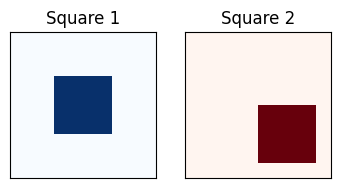

In [18]:
square1 = np.zeros((10, 10));square1[3:7, 3:7] = 1
square2 = np.zeros((10, 10));square2[5:9, 5:9] = 1 
plt.subplot(1, 3, 1);plt.imshow(square1, cmap='Blues', interpolation='none');plt.title('Square 1');plt.xticks([]);plt.yticks([])
plt.subplot(1, 3, 2);plt.imshow(square2, cmap='Reds', interpolation='none');plt.title('Square 2');plt.xticks([]);plt.yticks([])
plt.show()


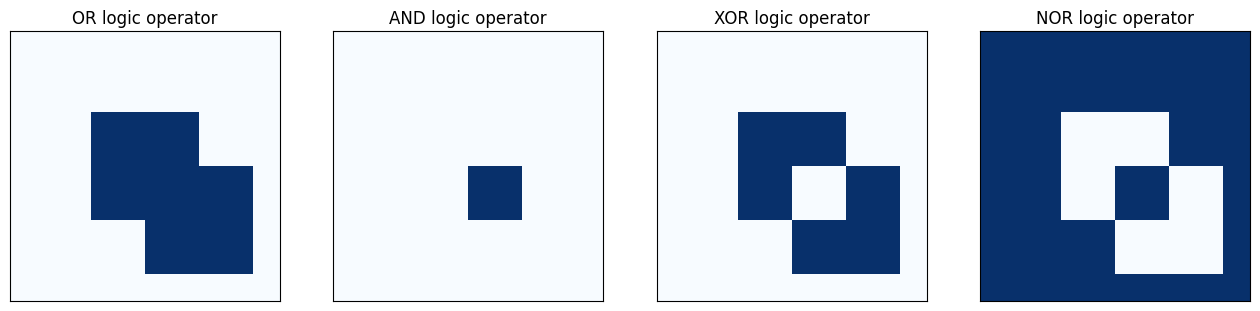

In [19]:
fig = plt.figure(figsize=[16,9])
orImg = np.zeros_like(square2)
andImg = np.zeros_like(square2)
XorImg = np.zeros_like(square2)
NorImg = np.zeros_like(square2)

# orImg = np.logical_or(square1, square2)
# orImg = (square1.astype(int) | square2.astype(int)).astype(bool)
for i in range(len(square1)):
    for j in range(len(square1)):
        if square1[i, j] == 1 or square2[i, j] == 1:orImg[i, j] = 1
        else: orImg[i, j] = 0
plt.subplot(1, 4, 1);plt.imshow(orImg, cmap='Blues', interpolation='none');plt.title('OR logic operator');plt.xticks([]);plt.yticks([])
# andImg = np.logical_and(square1, square2)
# andImg = (square1.astype(int) & square2.astype(int)).astype(bool)
for i in range(len(square1)):
    for j in range(len(square1)):
        if square1[i, j] == 1 and square2[i, j] == 1:andImg[i, j] = 1
        else: andImg[i, j] = 0
plt.subplot(1, 4, 2);plt.imshow(andImg, cmap='Blues', interpolation='none');plt.title('AND logic operator');plt.xticks([]);plt.yticks([])
# XorImg = np.logical_xor(square1, square2)
# XorImg = (square1.astype(bool) ^ square2.astype(bool)).astype(int)
for i in range(len(square1)):
    for j in range(len(square1)):
        if (square1[i, j] == 1 and square2[i, j] == 1) or (square1[i, j] == 0 and square2[i, j] == 0):XorImg[i, j] = 0
        else: XorImg[i, j] = 1
plt.subplot(1, 4, 3);plt.imshow(XorImg, cmap='Blues', interpolation='none');plt.title('XOR logic operator');plt.xticks([]);plt.yticks([])
# NorImg = ~(square1.astype(bool) | square2.astype(bool)).astype(int)
for i in range(len(square1)):
    for j in range(len(square1)):
        if (square1[i, j] == 1 and square2[i, j] == 1) or (square1[i, j] == 0 and square2[i, j] == 0):NorImg[i, j] = 1
        else: NorImg[i, j] = 0
plt.subplot(1, 4, 4);plt.imshow(NorImg, cmap='Blues', interpolation='none');plt.title('NOR logic operator');plt.xticks([]);plt.yticks([])
plt.show()

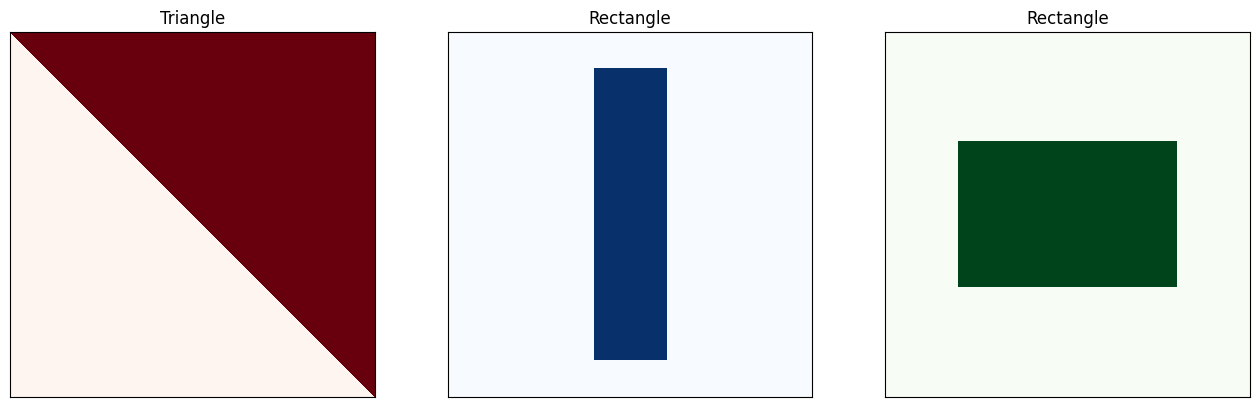

In [20]:
fig = plt.figure(figsize=[16,9])
Triangle = np.zeros((1000, 1000));
Rectangle1 = np.zeros((1000, 1000));Rectangle1[100:900, 400:600] = 1 
Rectangle2 = np.zeros((1000, 1000));Rectangle2[300:700, 200:800] = 1 
for i in range (len(Triangle)):
    for j in range (i, len(Triangle[0])):
       Triangle[i, j] = 1 
plt.subplot(1, 3, 1);plt.imshow(Triangle, cmap='Reds', interpolation='none');plt.title('Triangle');plt.xticks([]);plt.yticks([])
plt.subplot(1, 3, 2);plt.imshow(Rectangle1, cmap='Blues', interpolation='none');plt.title('Rectangle');plt.xticks([]);plt.yticks([])
plt.subplot(1, 3, 3);plt.imshow(Rectangle2, cmap='Greens', interpolation='none');plt.title('Rectangle');plt.xticks([]);plt.yticks([])
plt.show()

**Answers 25-30**

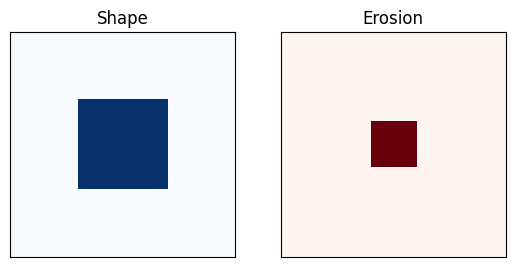

In [21]:
def Erosion(img, dim):
    if dim % 2 == 0:return "Dimension not valid"
    else:
        newImg = np.zeros_like(img);fit = np.ones((dim, dim))
        for i in range(dim // 2, len(img) - dim // 2):
            for j in range(dim // 2, len(img[0]) - dim // 2):
                if np.array_equal(fit, img[i - dim // 2 : i + dim // 2 + 1, j - dim // 2 : j + dim // 2 + 1]):newImg[i, j] = 1
        newImg[:dim // 2] = 0;newImg[-dim // 2:] = 0
        newImg[:, :dim // 2] = 0;newImg[:, -dim // 2:] = 0
    return newImg
erosion=Erosion(square1, 3)
plt.subplot(1, 2, 1);plt.imshow(square1, cmap='Blues', interpolation='none');plt.title('Shape');plt.xticks([]);plt.yticks([])
plt.subplot(1, 2, 2);plt.imshow(erosion, cmap='Reds', interpolation='none');plt.title('Erosion');plt.xticks([]);plt.yticks([])
plt.show()

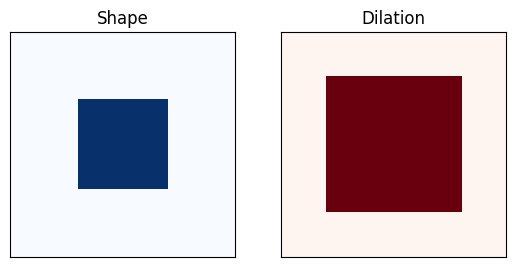

In [22]:
def Dilation(img, dim):
    if dim % 2 == 0:return "Dimension not valid"
    else:
        newImg = np.zeros_like(img)
        fit = np.ones((dim, dim))
        for i in range(dim // 2, len(img) - dim // 2):
            for j in range(dim // 2, len(img[0]) - dim // 2):
                if np.any(img[i - dim // 2 : i + dim // 2 + 1, j - dim // 2 : j + dim // 2 + 1] == fit):newImg[i, j] = 1
        newImg[:dim // 2] = 0;newImg[-dim // 2:] = 0
        newImg[:, :dim // 2] = 0;newImg[:, -dim // 2:] = 0
    return newImg
dilation=Dilation(square1, 3)
plt.subplot(1, 2, 1);plt.imshow(square1, cmap='Blues', interpolation='none');plt.title('Shape');plt.xticks([]);plt.yticks([])
plt.subplot(1, 2, 2);plt.imshow(dilation, cmap='Reds', interpolation='none');plt.title('Dilation');plt.xticks([]);plt.yticks([])
plt.show()

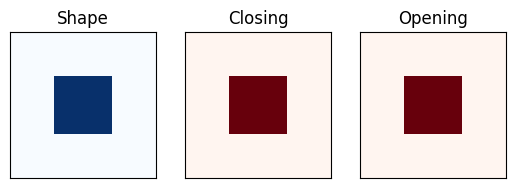

In [23]:
def Opening(img, dim):return Erosion(Dilation(img, dim), dim)
def Closing(img, dim):return Dilation(Erosion(img, dim), dim)
close = Closing(square1, 3)
open = Opening(square1, 3)
plt.subplot(1, 3, 1);plt.imshow(square1, cmap='Blues', interpolation='none');plt.title('Shape');plt.xticks([]);plt.yticks([])
plt.subplot(1, 3, 2);plt.imshow(close, cmap='Reds', interpolation='none');plt.title('Closing');plt.xticks([]);plt.yticks([])
plt.subplot(1, 3, 3);plt.imshow(open, cmap='Reds', interpolation='none');plt.title('Opening');plt.xticks([]);plt.yticks([])
plt.show()

(array([[ 77., 332., 131., ...,   6.,   1.,   0.],
        [ 81., 343., 131., ...,   5.,   0.,   0.],
        [ 77., 344., 134., ...,   6.,   0.,   0.],
        ...,
        [120., 246., 119., ...,  47.,  14.,   0.],
        [117., 243., 115., ...,  34.,  15.,   0.],
        [128., 237., 112., ...,  27.,  12.,   0.]]),
 array([  1. ,  24.7,  48.4,  72.1,  95.8, 119.5, 143.2, 166.9, 190.6,
        214.3, 238. ]),
 <a list of 1180 BarContainer objects>)

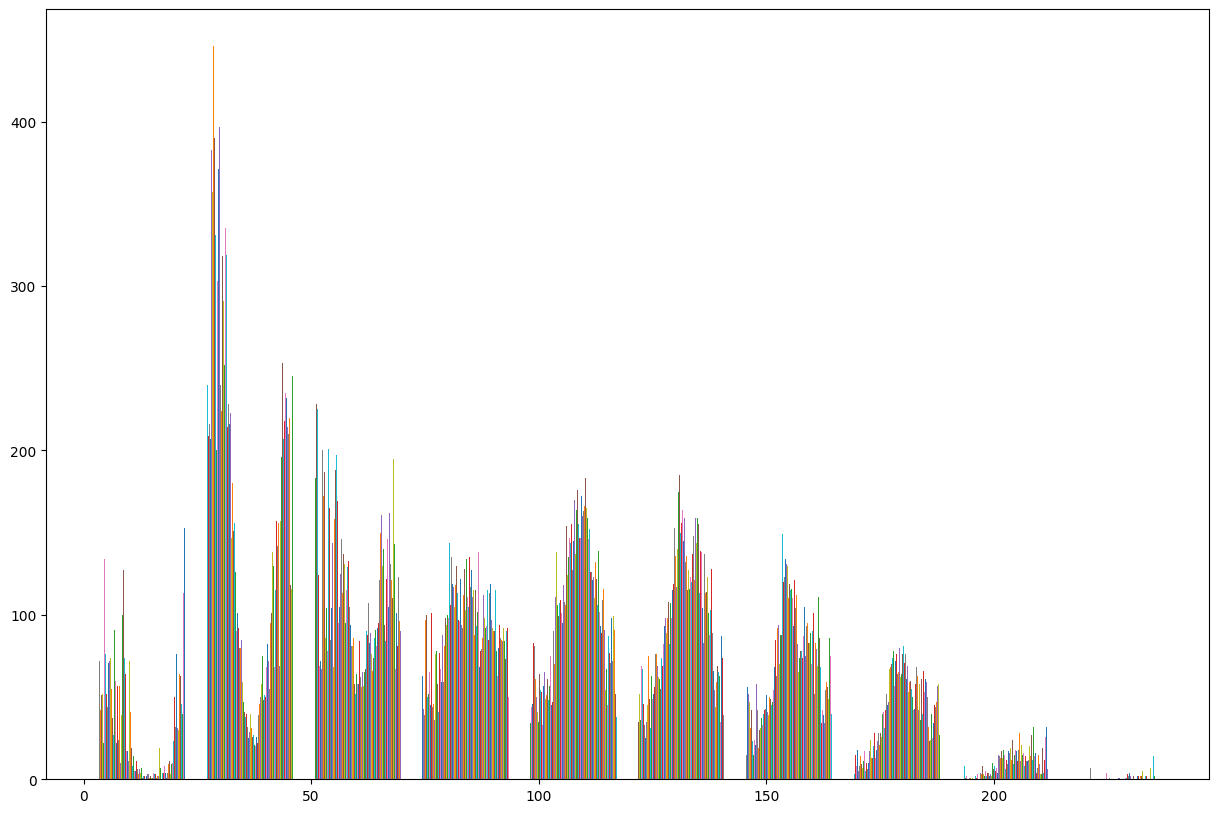

In [27]:
fig = plt.figure(figsize=(15, 10))
graph = gray_weights.reshape(gray_weights.shape[1]*gray_weights.shape[0])
plt.hist(gray_weights)

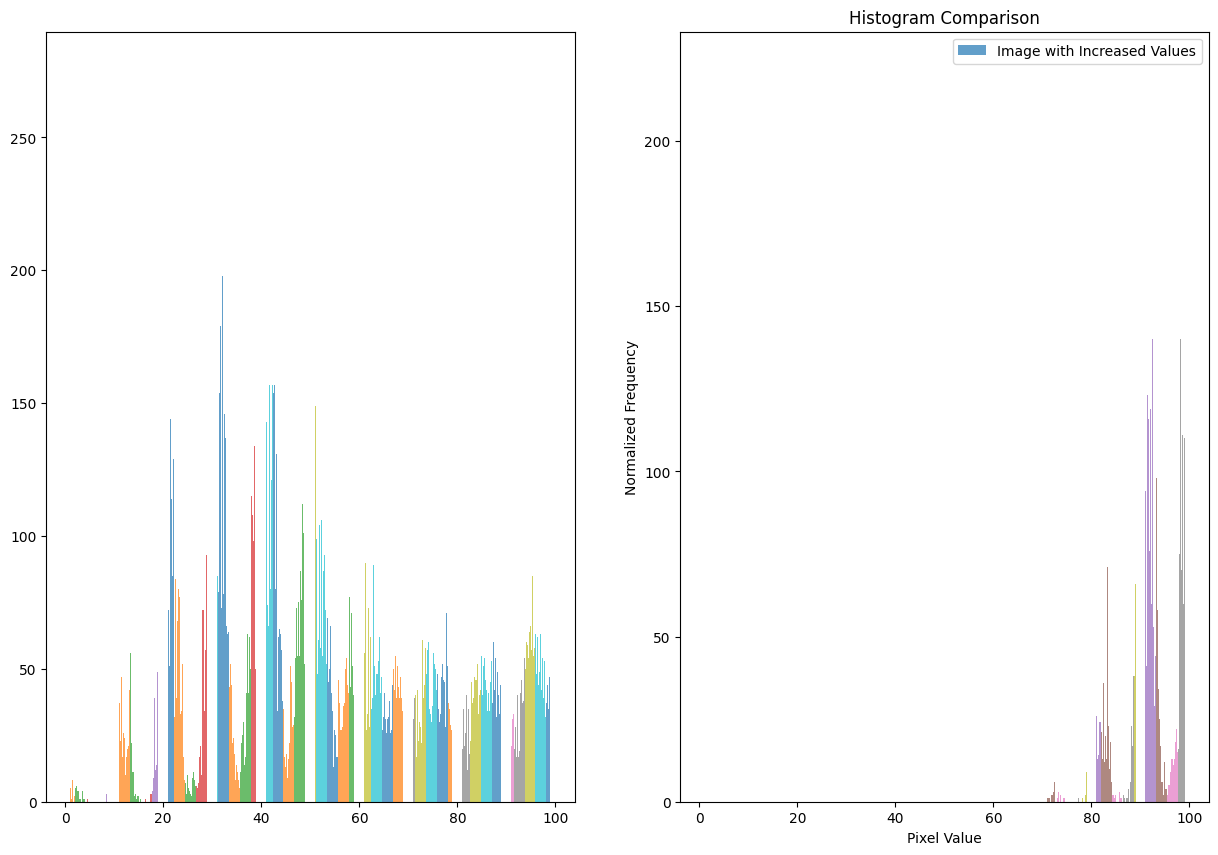

In [31]:
fig = plt.figure(figsize=(15, 10))
newGray = cv2.add(gray_weights, 70)
plt.subplot(1, 2, 1);plt.hist(gray_weights, range=[0, 100], alpha=0.7, label='Original Image')
plt.subplot(1, 2, 2);plt.hist(newGray, range=[0, 100], alpha=0.7, label='Image with Increased Values')

plt.title('Histogram Comparison')
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')
plt.legend()
plt.show()

In [34]:
img4 = cv2.imread(r'C:\Users\khale\Desktop\tps\deg\lci.jpeg', 1) 

cv2.imshow('low contrast image', img4)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [54]:
Rmax = np.max(img4);Rmin = np.min(img4)
increas_constract = np.ones_like(img4)
a = (Rmax - Rmin)/(170)
for i in range(img4.shape[2]):
    for j in range(img4.shape[1]):
        for k in range(img4.shape[0]):
            increas_constract[k, j, i] = a * img4[k, j, i] - 30
cv2.imshow('low contrast image', img4)
cv2.imshow('new contrast image', increas_constract)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [60]:
for i in range(img4.shape[2]):
    for j in range(img4.shape[1]):
        for k in range(img4.shape[0]):
            increas_constract[k, j, i] = Rmax * (img4[k, j, i] - 50)/220
cv2.imshow('low contrast image', img4)
cv2.imshow('new contrast image', increas_constract)
cv2.waitKey(0)
cv2.destroyAllWindows()